In [23]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
df = pd.read_csv('data.csv')


In [25]:
df.head()

,feature1,feature2,target
0,-0.872929,0.013042,1
1,1.312935,2.770534,1
2,2.340428,2.420996,1
3,2.294548,-0.404380,1
4,0.944105,0.477241,1


In [26]:
df.describe()

,feature1,feature2,target
count,200.000000,200.000000,200.000000
mean,0.127291,0.998048,0.500000
std,1.448313,1.029297,0.501255
min,-3.121909,-1.221998,0.000000
25%,-0.886754,0.353238,0.000000
50%,0.100130,0.866166,0.500000
75%,1.110329,1.679383,1.000000
max,3.663322,4.484226,1.000000


In [27]:
df.isnull().sum()

,0
feature1,0
feature2,0
target,0


In [28]:
x = df.drop('target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
PredefinedSplit = model.predict(X_test)

In [31]:
accuracy = model.score(X_test,y_test)

print("Accuracy:",accuracy*100)

Accuracy: 87.5


In [32]:
print("Confusion Matrix:\n", classification_report(y_test,PredefinedSplit))
print("\nClassification Report:\n", confusion_matrix(y_test,PredefinedSplit))

Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.77      1.00      0.87        17

    accuracy                           0.88        40
   macro avg       0.89      0.89      0.87        40
weighted avg       0.90      0.88      0.88        40


Classification Report:
 [[18  5]
 [ 0 17]]


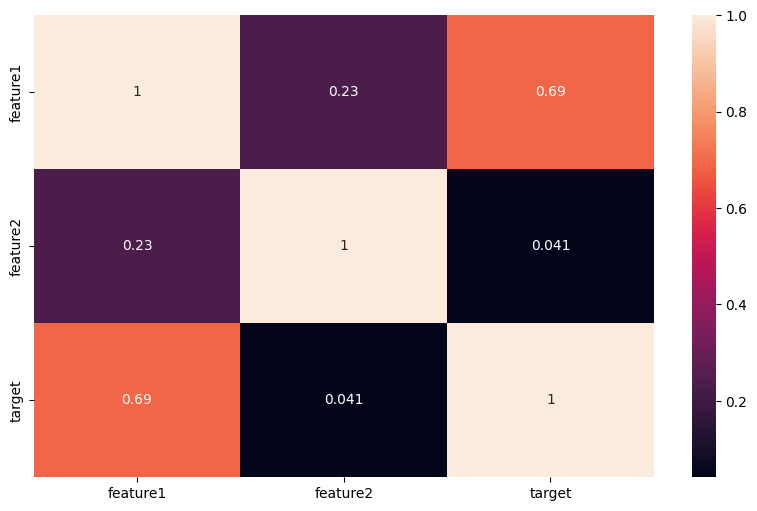

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

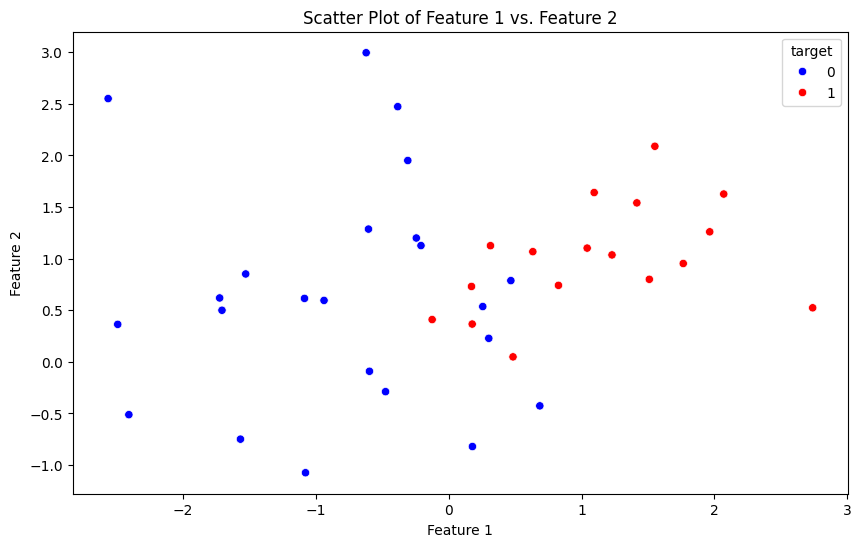

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['feature1'], y=X_test['feature2'], hue=y_test, palette={0: 'blue', 1: 'red'})

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Feature 1 vs. Feature 2')
plt.show()

In [35]:
coefficients = model.coef_
intercept = model.intercept_

print(f"Equation of the best-fit line: y = {intercept[0]:.4f} + ({coefficients[0][0]:.4f})*feature1 + ({coefficients[0][1]:.4f})*feature2")

Equation of the best-fit line: y = 0.4608 + (1.7118)*feature1 + (-0.5395)*feature2


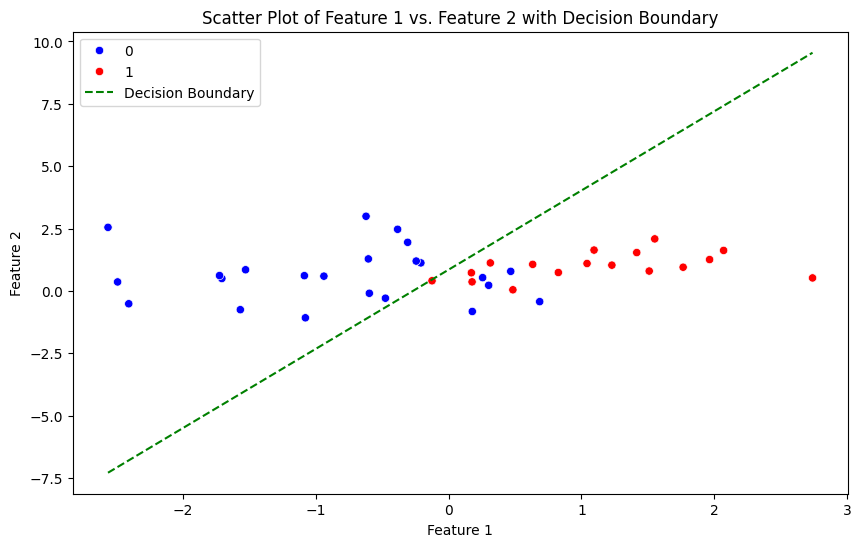

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test['feature1'], y=X_test['feature2'], hue=y_test, palette={0: 'blue', 1: 'red'})

x_values = numpy.array([X_test['feature1'].min(), X_test['feature1'].max()])
y_values = (-intercept[0] - coefficients[0][0] * x_values) / coefficients[0][1]

plt.plot(x_values, y_values, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Feature 1 vs. Feature 2 with Decision Boundary')
plt.legend()
plt.show()

In [37]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
accuracy = model.score(X_test,y_test)

print("Accuracy:",accuracy*100)

Accuracy: 87.5
